# Insight: Which is most popular product, least priced product and most sold product based on sales?



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats
import numpy as np
import scipy.stats as stats

In [3]:
# Take in all of our Grocery Store data and read it into pandas
Categories = "Resources_final/Categories_Modified.csv"
customer_csv = "Resources_final/customers_modified.csv"
cities_csv = "Resources_final/cities_Modify.csv"
Countries = "Resources_final/countries_Modified.csv"
Employees = "Resources_final/employees_Modified.csv"
Products = "Resources_final/products_Modified.csv"
Sales = "Resources_final/sales_Modified.csv"

products_df = pd.read_csv(Products)
sales_df = pd.read_csv(Sales)

In [4]:
products_df.head()

,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays
0,1,Flour - Whole Wheat,"742,988",3,Medium,21:49.2,Durable,NaN,NaN
1,2,Cookie Chocolate Chip With,"912,329",3,Medium,39:11.0,NaN,NaN,NaN
2,3,Onions - Cippolini,"91,379",9,Medium,11:51.6,Weak,False,111.0
3,4,"Sauce - Gravy, Au Jus, Mix","543,055",9,Medium,46:28.9,Durable,NaN,NaN
4,5,Artichokes - Jerusalem,"654,771",2,Low,13:35.4,Durable,True,27.0


In [5]:
sales_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,0,38:25.4,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,0,03:31.1,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,0,31:56.9,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,0,43:55.4,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,0,37:03.9,4BGS0Z5OMAZ8NDAFHHP3


In [6]:
#4.Build a scatter plot identifying total sales revenue per product nationwide?[Gargi]

# Merge the first two datasets on ProductID so that no data is lost 
combined_productSales_df = pd.merge(sales_df, products_df,
                                 how='outer', on='ProductID')
# combined_productSales_df["Price"] = pd.to_numeric(combined_productSales_df['Price'],errors='coerce')
combined_productSales_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays
0,1,6,27039,381,7,NaN,0,38:25.4,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0
1,651,2,36984,381,10,0.1,0,10:35.2,XQL4NP8GP3LIJBPC78BR,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0
2,984,18,98474,381,25,0.2,0,51:09.2,W57VJBEIM4PJ99L40VCT,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0
3,1077,14,47778,381,13,0.2,0,51:47.2,JRWW0M7TOFQA29YTPL9Y,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0
4,1396,4,62919,381,16,NaN,0,NaN,DFDKR0C1CPMTNMTHWN9Z,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0


In [7]:
#combined_productSales_df.head()['Price'][0]
reg = re.compile(',')
#reg.sub('', combined_productSales_df.head()['Price'][0])
combined_productSales_df['Price'] = combined_productSales_df['Price'].apply(lambda s: reg.sub('', s))
combined_productSales_df['Price'] = combined_productSales_df['Price'].astype(float)

In [8]:
#Total Sales Per SalesID
combined_productSales_df["Total Sales"] = combined_productSales_df["Quantity"] * combined_productSales_df["Price"]
combined_productSales_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,Total Sales
0,1,6,27039,381,7,NaN,0,38:25.4,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,442337.0,1,High,26:53.6,NaN,NaN,41.0,3096359.0
1,651,2,36984,381,10,0.1,0,10:35.2,XQL4NP8GP3LIJBPC78BR,Vaccum Bag 10x13,442337.0,1,High,26:53.6,NaN,NaN,41.0,4423370.0
2,984,18,98474,381,25,0.2,0,51:09.2,W57VJBEIM4PJ99L40VCT,Vaccum Bag 10x13,442337.0,1,High,26:53.6,NaN,NaN,41.0,11058425.0
3,1077,14,47778,381,13,0.2,0,51:47.2,JRWW0M7TOFQA29YTPL9Y,Vaccum Bag 10x13,442337.0,1,High,26:53.6,NaN,NaN,41.0,5750381.0
4,1396,4,62919,381,16,NaN,0,NaN,DFDKR0C1CPMTNMTHWN9Z,Vaccum Bag 10x13,442337.0,1,High,26:53.6,NaN,NaN,41.0,7077392.0


In [9]:
item = combined_productSales_df.groupby(["ProductID", "ProductName", "Price"])

product_unique = item["ProductName"].nunique()
product_unique
sum_quantity = item["Quantity"].sum()
sum_quantity
sum_TotalSales = item["Total Sales"].sum()
sum_TotalSales
price = item["Price"].max()
df = pd.DataFrame({"Quantity": sum_quantity, "Sum Of Total Sales Per Product": sum_TotalSales})
newdf = df.reset_index()
newdf.head()

,ProductID,ProductName,Price,Quantity,Sum Of Total Sales Per Product
0,1,Flour - Whole Wheat,742988.0,28687,2.131410e+10
1,2,Cookie Chocolate Chip With,912329.0,29248,2.668380e+10
2,3,Onions - Cippolini,91379.0,30386,2.776642e+09
3,4,"Sauce - Gravy, Au Jus, Mix",543055.0,30015,1.629980e+10
4,5,Artichokes - Jerusalem,654771.0,29769,1.949188e+10


In [10]:
most_sale = newdf.sort_values(["Sum Of Total Sales Per Product"], ascending = False)
most_sale.head()

,ProductID,ProductName,Price,Quantity,Sum Of Total Sales Per Product
148,149,Zucchini - Yellow,984644.0,31604,3.111869e+10
247,248,Beef - Inside Round,993193.0,30521,3.031324e+10
97,98,Shrimp - 31/40,998755.0,30149,3.011146e+10
103,104,Tia Maria,982471.0,30645,3.010782e+10
391,392,Puree - Passion Fruit,988263.0,30458,3.010051e+10


In [11]:
least_price = newdf.sort_values(["Price"], ascending = False)
least_price.head()

,ProductID,ProductName,Price,Quantity,Sum Of Total Sales Per Product
97,98,Shrimp - 31/40,998755.0,30149,3.011146e+10
247,248,Beef - Inside Round,993193.0,30521,3.031324e+10
391,392,Puree - Passion Fruit,988263.0,30458,3.010051e+10
344,345,Bread - Calabrese Baguette,985978.0,29218,2.880831e+10
148,149,Zucchini - Yellow,984644.0,31604,3.111869e+10


In [12]:
max_quantity = newdf.sort_values(["Quantity"], ascending = False)
max_quantity.head()


,ProductID,ProductName,Price,Quantity,Sum Of Total Sales Per Product
360,361,Coffee Decaf Colombian,364516.0,32395,1.180850e+10
326,327,"Appetizer - Mini Egg Roll, Shrimp",71436.0,32179,2.298739e+09
424,425,Wine - Redchard Merritt,567898.0,31983,1.816308e+10
226,227,Cheese - Taleggio D.o.p.,554699.0,31981,1.773983e+10
164,165,Bread Crumbs - Japanese Style,449.0,31767,1.426338e+07


# Insight: Cities Vs Customers
# * Top 5 cities with the most and least customers.
# * Normal distribution of customers over all cities.
# * T- test to compare customers in California to customers in all cities


In [21]:
customer_csv = "Resources_final/customers_modified.csv"
cities_csv = "Resources_final/cities_Modify.csv"

# Import the data into a Pandas DataFrame
customer_df = pd.read_csv(customer_csv)
cities_df = pd.read_csv(cities_csv)
# popular_df
combined_df =pd.merge(customer_df, cities_df, how='outer', on=['CityID'])
combined_df = combined_df.dropna(how="any")
# combined_df = combined_df.drop(columns=['CategoryID', 'TotalPrice', 'ModifyDate','IsAllergic', 'VitalityDays','Class', 'Resistant', 'CustomerID', 'Discount', 'TransactionNumber', 'SalesDate', 'SalesPersonID'])

combined_df.head(10)

,CustomerID,FirstName,MiddleInitial,LastName,CityID,Address,CityName,Zipcode,CountryID
0,1,Stefanie,Y,Frye,79,97 Oak Avenue,Oklahoma,40472,32
1,198,Todd,M,Franklin,79,169 Clarendon Way,Oklahoma,40472,32
2,224,Hilary,X,Fitzgerald,79,150 New Avenue,Oklahoma,40472,32
3,228,Joy,O,Mcfarland,79,370 Cowley Avenue,Oklahoma,40472,32
4,250,Robin,Z,Kane,79,14 Clarendon Drive,Oklahoma,40472,32
5,314,Juanita,M,Bright,79,51 Nobel Blvd.,Oklahoma,40472,32
6,389,Ruby,S,Fritz,79,86 Second Freeway,Oklahoma,40472,32
7,438,Autumn,N,Simmons,79,157 Green Second Avenue,Oklahoma,40472,32
8,475,Sherry,Y,Blevins,79,907 White Old Drive,Oklahoma,40472,32
9,507,Bobby,X,Pitts,79,851 Oak St.,Oklahoma,40472,32


In [14]:
# Number of customers per city
city_customers = combined_df.groupby(["CityName"])['CustomerID'].count()
city_customers = pd.DataFrame(city_customers)
city_customers = city_customers.rename(columns={"CustomerID":"# customers"})
city_customers=city_customers.sort_values(by=['# customers'], ascending = False)
city_customers.head(10).reset_index()

,CityName,# customers
0,Tucson,1092
1,Columbus,1085
2,Fort Wayne,1080
3,Indianapolis,1079
4,Sacramento,1076
5,Phoenix,1075
6,Charlotte,1071
7,Yonkers,1068
8,Honolulu,1060
9,Jackson,1056


In [15]:
print("The 5 cities with the most customers:")
city_customers.head(5).sort_values(["# customers"], ascending = False).reset_index()

The 5 cities with the most customers:


,CityName,# customers
0,Tucson,1092
1,Columbus,1085
2,Fort Wayne,1080
3,Indianapolis,1079
4,Sacramento,1076


In [16]:
print("The 5 cities with the least customers:")
city_customers.tail(5).sort_values(["# customers"], ascending = True).reset_index()

The 5 cities with the least customers:


,CityName,# customers
0,Atlanta,955
1,New Orleans,956
2,Fresno,975
3,Virginia Beach,976
4,Tacoma,977


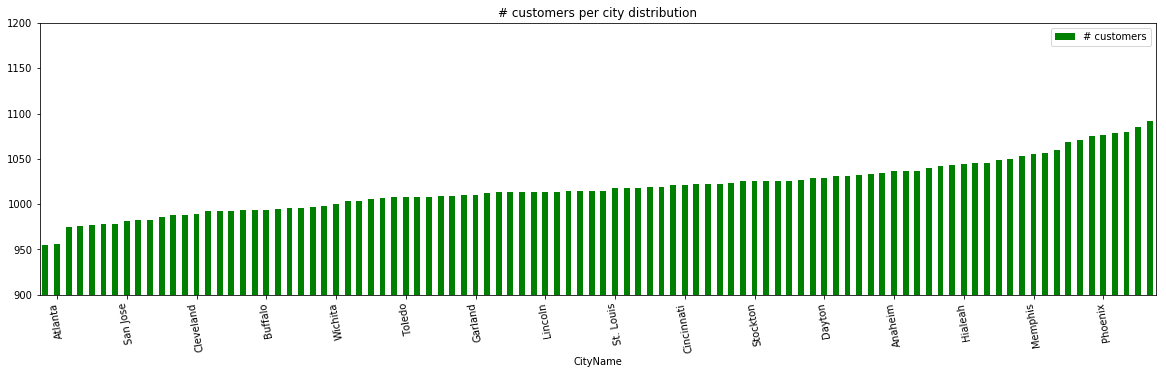

In [17]:
# Customer distribution per city
x=list(np.arange(1,96,6))
city_customers=city_customers.sort_values(by=['# customers'])
city_customers['Range']=range(1,len(city_customers)+1)
aux=city_customers[city_customers['Range'].isin(x)]
labels=list(aux.index)
city_customers=city_customers.drop(columns=['Range'])


fig,ax=plt.subplots(figsize=(20,5))
city_customers.plot.bar(ax=ax, color='green')
plt.xticks(x, labels, rotation=100)
plt.ylim(900,1200)
plt.title('# customers per city distribution')
plt.show()

In [18]:
# Get customers for famous 4 cities of California
d_list = city_customers.filter(items=['San Diego', 'Los Angeles', 'Las Vegas', 'San Francisco'], axis=0)

mean: 1018.562500
std: 28.241370


<function matplotlib.pyplot.show(*args, **kw)>

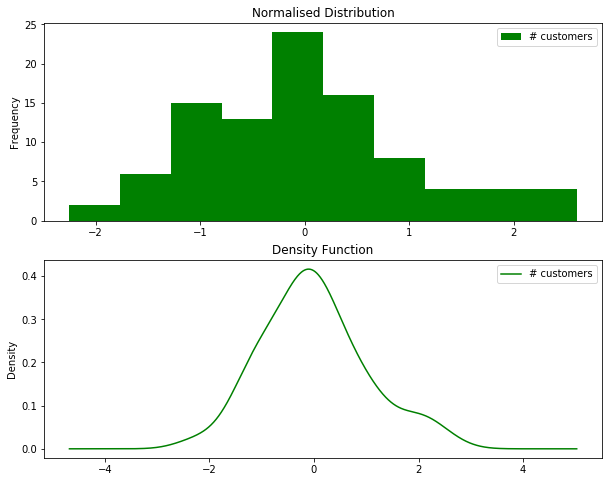

In [19]:
city_cust_mean=city_customers.mean()

city_cust_std=city_customers.std()

print("mean: %f" %city_cust_mean)
print("std: %f" %city_cust_std)

#Crea Z=(x-E(x))/std
city_cust_norm=(city_customers-city_cust_mean)/city_cust_std
fig,axes=plt.subplots(nrows=2,figsize=(10,8))

city_cust_norm.plot.hist(bins=10, ax=axes[0], color='green', histtype='barstacked')
axes[0].set_title('Normalised Distribution')

city_cust_norm.plot.density(ax=axes[1], color='green')
axes[1].set_title('Density Function')

plt.show

In [20]:
# T test to compare customers in california to customers in all cities
stats.stats.ttest_1samp(d_list, city_cust_mean)

Ttest_1sampResult(statistic=# customers   -0.483239
dtype: float64, pvalue=array([0.66200015]))